## Distribuição de Frequência 

In [1]:
# Bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Criando os dados
dados = np.array(
    [
        160, 165, 167, 164, 160, 166, 160, 161, 150, 152, 173, 160, 155,
        164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164,
        155, 152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172, 153
    ]
)

### Ordenação

In [3]:
# Ordenados os dados
dados = np.sort(dados)
dados

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

In [4]:
# Criando as variáveis miníma e máxima 
minimo = dados.min()
maximo = dados.max()
minimo, maximo

(150, 173)

In [5]:
# Valores únicos 
np.unique(dados, return_counts=True)

(array([150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163,
        164, 165, 166, 167, 168, 169, 170, 172, 173]),
 array([1, 1, 2, 1, 1, 4, 3, 1, 2, 5, 4, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1],
       dtype=int64))

<BarContainer object of 40 artists>

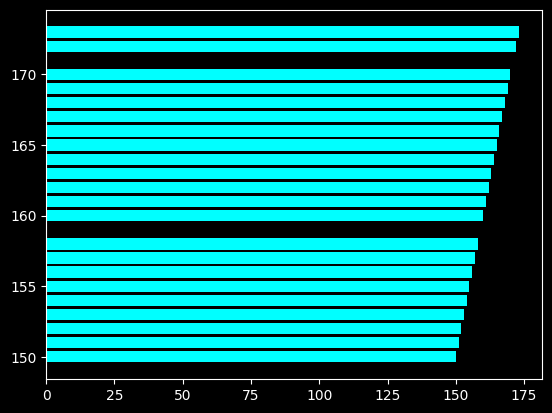

In [6]:
# Visualizando o gráfico 
plt.barh(dados, dados, color='cyan')

## Número de classes

- i = 1 + 3.3 log n

In [7]:
# definido o N
n = len(dados)
n

40

In [8]:
# Formula de Sturger
i = 1 + 3.3 * np.log10(n)
i

6.286797971382275

In [9]:
# Arrendondado o valor de i
i = round(i)
i

6

## Amplitude do intervalo
h = AA / i
AA = Xmax - Xmin

In [10]:
# Amplitude amostral
AA = maximo - minimo
AA

23

In [11]:
# Amplitude do intervalo de classe
h = AA / i
h

3.8333333333333335

In [12]:
# Biblioteca
from math import ceil
h = ceil(h)
h

4

## Construção da Distribuição de Frequência

In [13]:
# Criando o intervalo da distribuição
intervalos = np.arange(minimo, maximo + 2, step=h)
intervalos

array([150, 154, 158, 162, 166, 170, 174])

In [14]:
# Criando a contagem dos intervalos
intervalo1, intervalo2, intervalo3, intervalo4, intervalo5, intervalo6 = 0, 0, 0, 0, 0, 0
for i in range(n):
    if dados[i] >= intervalos[0] and dados[i] < intervalos[1]:
        intervalo1 += 1
    elif dados[i] >= intervalos[1] and dados[i] < intervalos[2]:
        intervalo2 += 1
    elif dados[i] >= intervalos[2] and dados[i] < intervalos[3]:
        intervalo3 += 1
    elif dados[i] >= intervalos[3] and dados[i] < intervalos[4]:
        intervalo4 += 1
    elif dados[i] >= intervalos[4] and dados[i] < intervalos[5]:
        intervalo5 += 1
    elif dados[i] >= intervalos[5] and dados[i] < intervalos[6]:
        intervalo6 += 1

In [15]:
# Adicionado os intervalas em uma lista
lista_intervalos = []
lista_intervalos.append(intervalo1)
lista_intervalos.append(intervalo2)
lista_intervalos.append(intervalo3)
lista_intervalos.append(intervalo4)
lista_intervalos.append(intervalo5)
lista_intervalos.append(intervalo6)
lista_intervalos

[5, 9, 11, 7, 5, 3]

In [16]:
# Criando a lista de classes
lista_classe = []
for i in range(len(lista_intervalos)):
    lista_classe.append(f'{str(intervalos[i])}|-{str(intervalos[i + 1])}')

lista_classe

['150|-154', '154|-158', '158|-162', '162|-166', '166|-170', '170|-174']

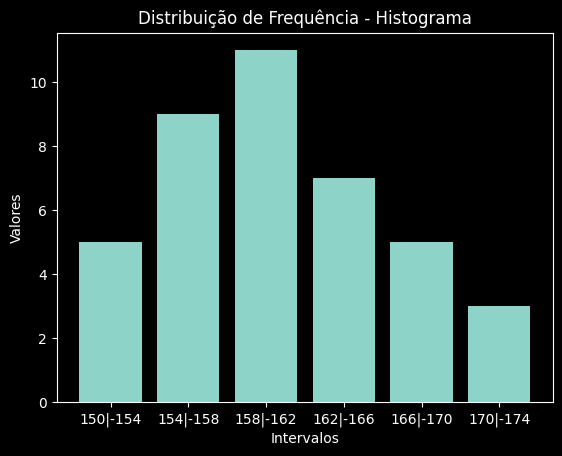

In [17]:
# Visualizando o gráfico
plt.bar(lista_classe, lista_intervalos)
plt.title('Distribuição de Frequência - Histograma')
plt.xlabel('Intervalos')
plt.ylabel('Valores');

## Distribuição de Frequência e Histograma com Numpy e Matplotlib

In [18]:
# Criando a frequência e o intervalo de classes
frequencia, classes = np.histogram(dados)
frequencia, classes, len(classes)

(array([4, 2, 7, 3, 9, 3, 5, 3, 2, 2], dtype=int64),
 array([150. , 152.3, 154.6, 156.9, 159.2, 161.5, 163.8, 166.1, 168.4,
        170.7, 173. ]),
 11)

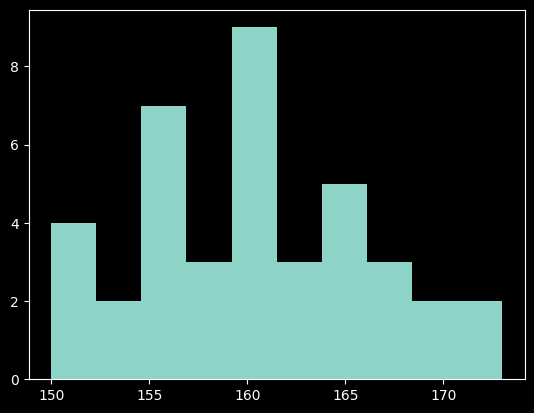

In [19]:
# Gráfico
plt.hist(dados, bins=classes);

In [20]:
# Com bins=5
frequencia, classes = np.histogram(dados, bins=5)
frequencia, classes

(array([ 6, 10, 12,  8,  4], dtype=int64),
 array([150. , 154.6, 159.2, 163.8, 168.4, 173. ]))

(array([ 6., 10., 12.,  8.,  4.]),
 array([150. , 154.6, 159.2, 163.8, 168.4, 173. ]),
 <BarContainer object of 5 artists>)

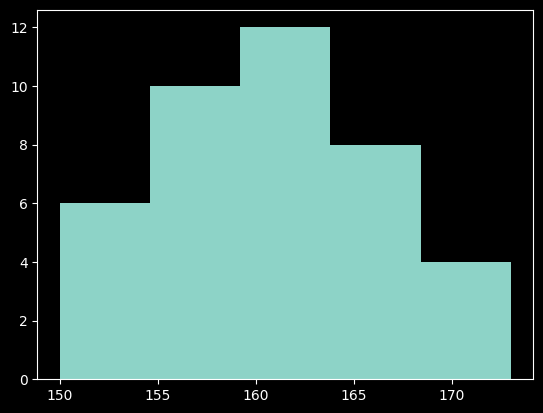

In [21]:
# Gráfico
plt.hist(dados, classes)

In [22]:
# Distribuição de Frequência com bins='sturges'
frequencia, classes = np.histogram(dados, bins='sturges')
frequencia, classes

(array([ 5,  8,  3, 12,  5,  4,  3], dtype=int64),
 array([150.        , 153.28571429, 156.57142857, 159.85714286,
        163.14285714, 166.42857143, 169.71428571, 173.        ]))

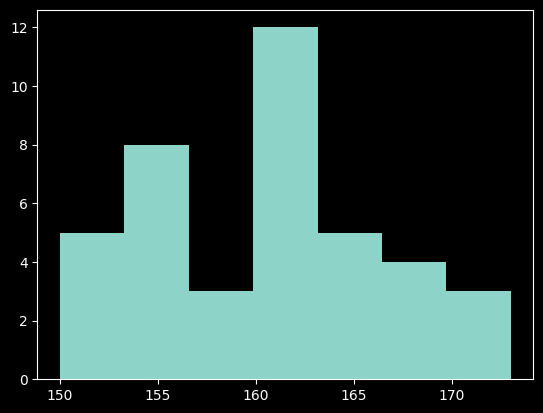

In [23]:
# gráfico
plt.hist(dados, classes);

## Distribuição de Frequência e histograma com pandas e seaborn

In [24]:
# Criando o dataset
ds = pd.DataFrame({'dados': dados})
ds.head()

,dados
0,150
1,151
2,152
3,152
4,153


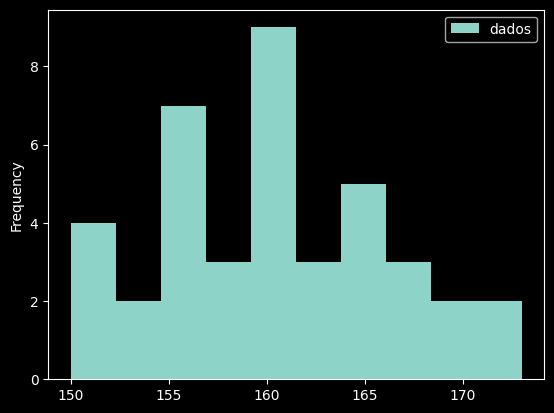

In [25]:
# Gráfico
ds.plot.hist();

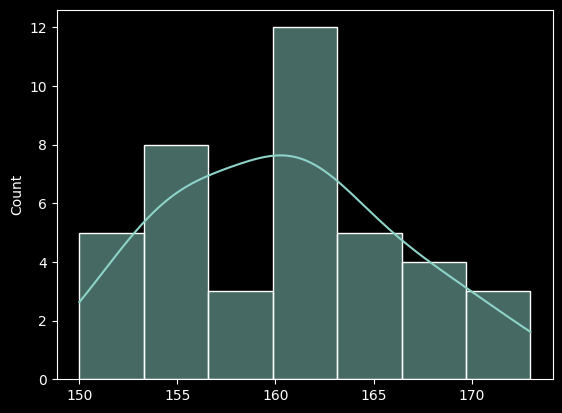

In [26]:
# Gráfico com seaborn
sns.histplot(dados, kde=True);